In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import ternary # ternary plot has a bug
import plotly.express as px
import h5py
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D

import rasterio
from scipy.interpolate import griddata

# import geopandas as gpd

from matplotlib.patches import Circle, Wedge, Polygon
from matplotlib import pyplot as p

import cmocean # Beautiful colormaps for oceanography
import cmocean.cm as cmo
import os
import matplotlib.patheffects as path_effects

from matplotlib.colors import Normalize

from mpl_toolkits.axes_grid1 import make_axes_locatable

from netCDF4 import Dataset as NetCDFFile 

from obspy.imaging.beachball import beach

# for beachball - there are some error with using obspy
from pyrocko.plot import beachball
from pyrocko import moment_tensor as ptm

import cartopy.crs as ccrs
import cartopy.mpl.geoaxes
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature

from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.ticker as mticker
from pathlib import Path
%matplotlib inline

import harmonica as hm

from obspy.core import UTCDateTime

from matplotlib.patches import Polygon

import seaborn as sns
sns.set()
sns.set_style(style='white') 
sns.set_style("ticks", {"xtick.major.size": 0.5, "ytick.major.size": 0.5})

import shapefile as shp

from shapely.geometry import LineString

# set the font globally
plt.rcParams.update({'font.family':'Helvetica'})

## Japan

In [67]:
# data = pd.read_csv('sum_with_2005_eqs.csv', header = 'infer')
data = pd.read_csv("/Users/mohd0001/Research/PhD_Monash/Paper2/time-series/data/ryu_kur_class_by_loc_net.csv", header = 'infer')
# data.dtypes

data.sort_values(by = 'MW', ascending = False, inplace = True)

data['DATE'] = pd.to_datetime(data['DATE']) # change dtype to datetime format
data['DATE'] = data['DATE'].dt.strftime('%Y-%m-%d') # change dtype to object

# data['DATE'] and data['TIME'] should be object (str) to perform + operator

data_dummy = np.array(data['DATE'] + ' ' + data['TIME'])

data_ev_time = []

for val in data_dummy:
    data_ev_time.append(UTCDateTime(val))

    
ref_date = data_ev_time[0]

data_ev_time = np.array(data_ev_time)

date = []

for val in data_ev_time:
    date.append(val - ref_date)
    
date = np.array(date) # this is in seconds

data['YEARS'] = date/31536000

data = data.sort_values(by ='YEARS', ascending=True) # this is an important step

In [68]:
data_mthrust_jpn = data[(data['CLASS'] == 'MTHRUST') &
                    (data['MW'] <= 5) &
                    (data['LAT'] >= 34) & (data['LAT'] <= 41)] # tohoku rupture area megathrust

data_tohoku_rup = data[(data['CLASS'] == 'MTHRUST') &
                    (data['MW'] <= 5) &
                    (data['LAT'] >= 36) & (data['LAT'] <= 39.5)] # tohoku rupture area megathrust

data_mthrust = data[(data['CLASS'] == 'MTHRUST') &
                    (data['MW'] <= 5) &
                    (data['LON'] > 123)] # Ryu-Japan-KK megathrust, (data['LAT'] < 43)


depth = 0
mag = 5

data_DW_ryu = data[(data['CLASS'] == 'DGOING') &
               (data['DEPTH'] >= depth) &
               (data['MW'] <= mag) &
              (data['LAT'] < 34)] # Philipines

data_DW_jpn = data[(data['CLASS'] == 'DGOING') &
               (data['DEPTH'] >= depth) &
               (data['MW'] <= mag) &
              (data['LAT'] >= 34) & (data['LAT'] <= 41)] # Japan-kk

data_DW_kur = data[(data['CLASS'] == 'DGOING') &
               (data['DEPTH'] >= depth) &
               (data['MW'] <= mag) &
              (data['LAT'] > 41)] # Kuril Kamchatka

# (data['LAT'] < 34) & (data['LAT'] > 23.5) &
#               (data['LON'] > 123)

## scatter plot

Text(-15, 33, 'Philippine slab')

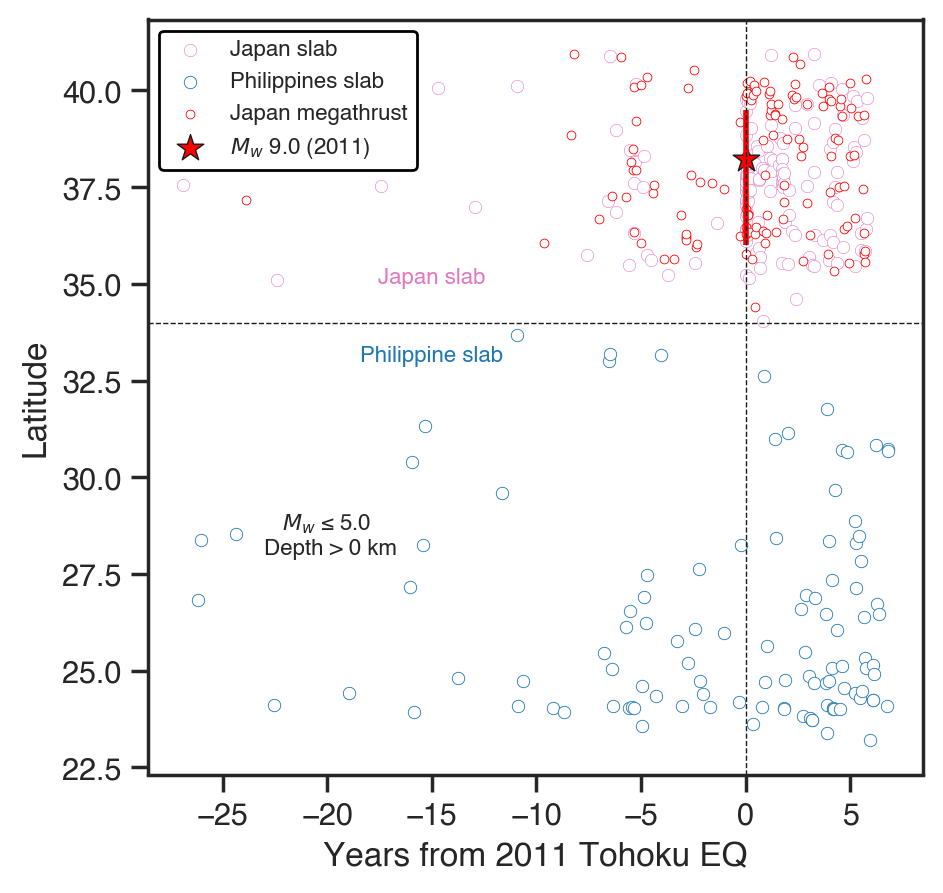

In [69]:
figsize=(5,5)
dpi = 200
fig, ax = plt.subplots(dpi = dpi, figsize=figsize)

fig1 = ax

fig1.scatter(data_DW_jpn['YEARS'], data_DW_jpn['LAT'],
             marker = 'o', s = 20, facecolor = 'white',
             edgecolor = 'tab:pink', linewidths = 0.2, label ='Japan slab')

fig1.scatter(data_DW_ryu['YEARS'], data_DW_ryu['LAT'],
             marker = 'o', s = 20, facecolor = 'white',
             edgecolor = 'tab:blue', linewidths = 0.3, label ='Philippines slab')

fig1.scatter(data_mthrust_jpn['YEARS'], data_mthrust_jpn['LAT'],
             marker = 'o', s = 10, facecolor = 'white',
             edgecolor = 'red', linewidths = 0.3, label ='Japan megathrust')


# fig1.scatter(data_DW_kur['YEARS'], data_DW_kur['LAT'],
#              marker = 'o', s = 5, c = 'tab:orange', alpha = 1,
#              edgecolor = 'k', linewidths = 0, label ='Kuril-Kamchatka slab')

fig1.set_xlabel('Years from 2011 Tohoku EQ')
# fig1.set_ylabel(r'$M_w$')
fig1.set_ylabel(r'Latitude')

# fig1.set_xlim([-30, 7]) # 1981-2018
# fig1.set_ylim([22, 42.5])

# fig1.text(-25, 35, 'Slab seismicit', fontsize=fs)

data_great = data[(data['CLASS'] == 'MTHRUST') & (data['MW'] >= 9)]
fig1.scatter(data_great['YEARS'], data_great['LAT'],
            marker = '*', s = 100, c = 'red', alpha = 1,
             edgecolor = 'k', linewidths = 0.5, label = '$M_w$ 9.0 (2011)')

fs = 8
fig1.legend(loc = 'upper left',
            fontsize = fs,
            facecolor="white",
            framealpha=1,
            edgecolor="black",
            markerscale=1)

fig1.text(-20, 28, '$M_w$ ≤ 5.0 \n Depth > 0 km', ha='center', fontsize=fs)

# Draw a vertical line at the location of the largest magnitude year
fig1.axvline(x=0, color='k', lw=0.5, linestyle='--')

fig1.vlines(x=0, ymin=36, ymax=39.5, color='red', linestyle='-', lw=2)

fig1.axhline(y=34, color='k', lw=0.5, linestyle='--')
fig1.text(-15, 35, 'Japan slab', fontsize=fs, color='tab:pink', ha = 'center')
fig1.text(-15, 33, 'Philippine slab', fontsize=fs, color='tab:blue', ha = 'center')

# plt.savefig("/Users/mohd0001/Research/PhD_Monash/Paper2/output/hist/Japan-Lat-Years.jpeg"
#             , dpi = 500, transparent= True, bbox_inches='tight')

## bar plot

/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

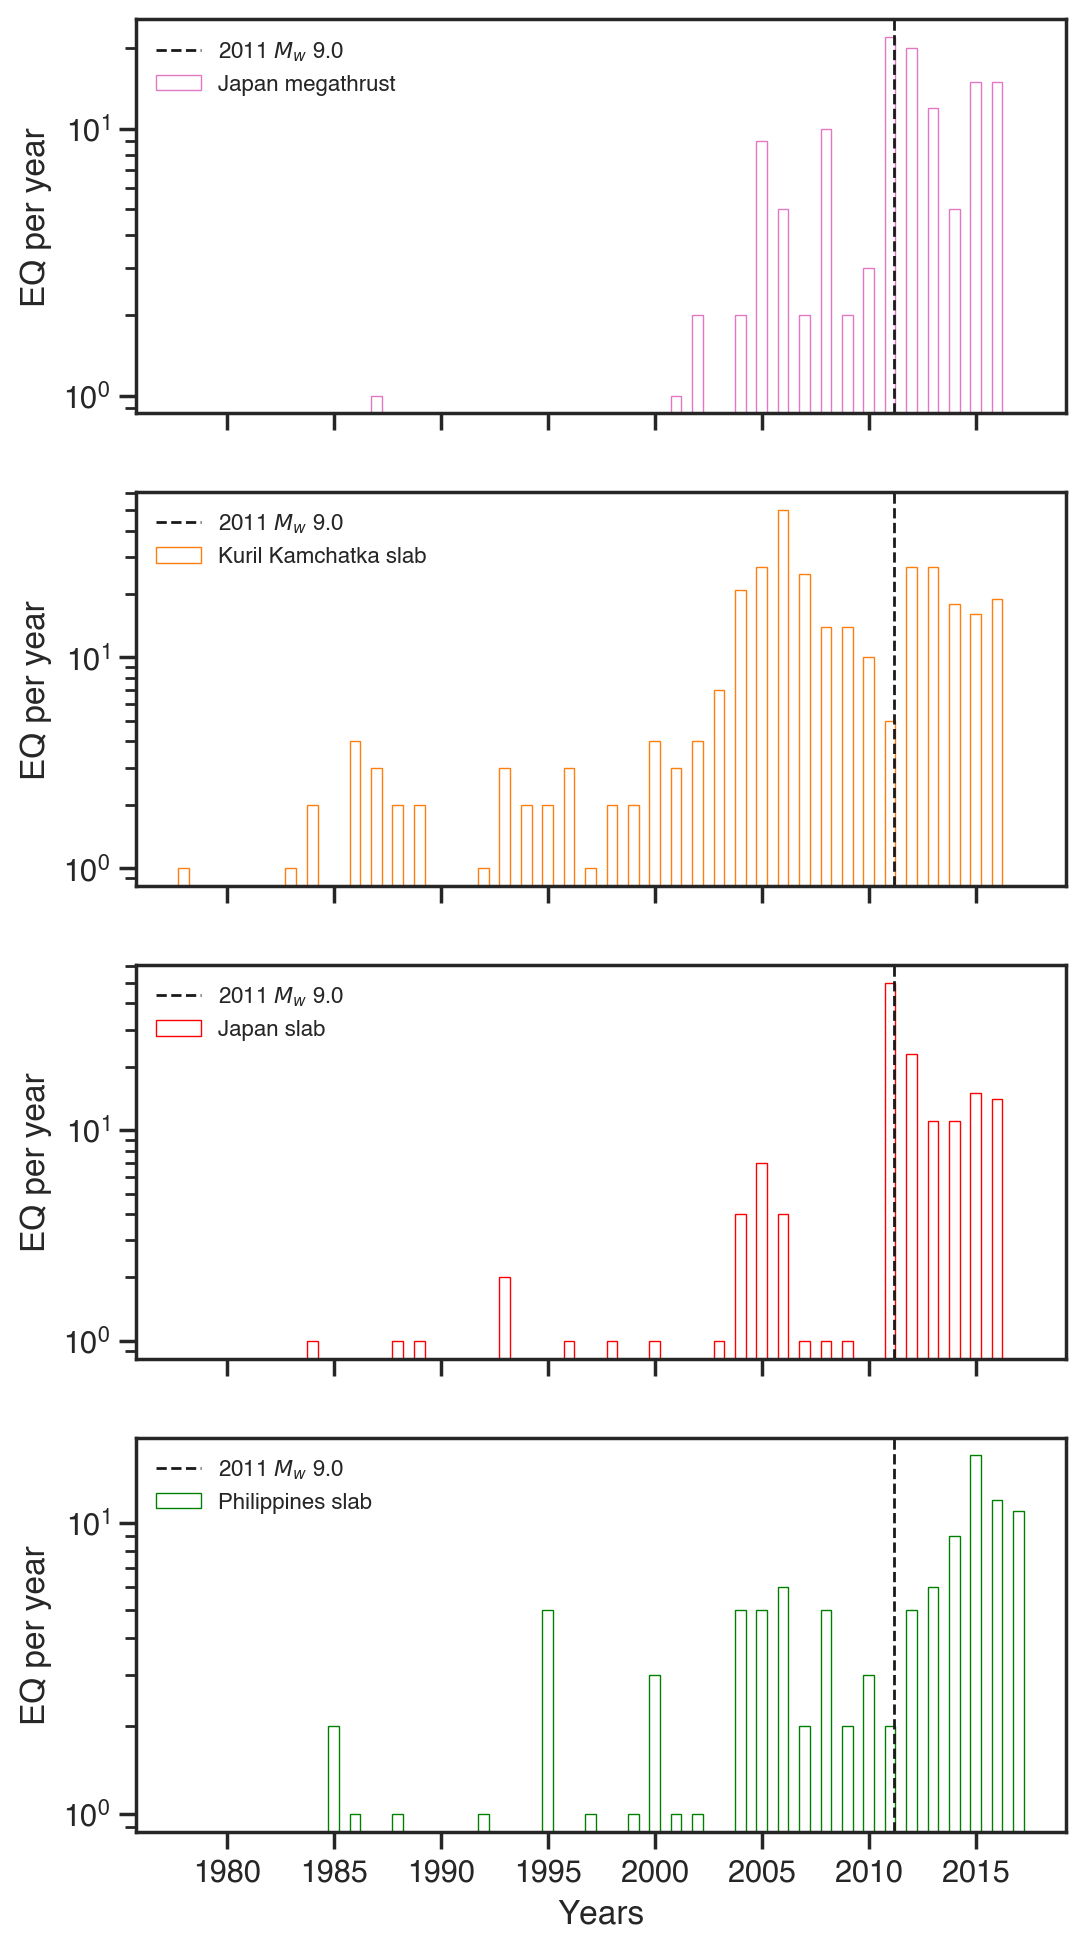

In [70]:
# Convert the 'Date' column to datetime format
data_mthrust_jpn['DATE'] = pd.to_datetime(data_mthrust_jpn['DATE'])
# Extract the year from the 'Date' column
data_mthrust_jpn['YEARS'] = data_mthrust_jpn['DATE'].dt.year


# Convert the 'Date' column to datetime format
data_DW_jpn['DATE'] = pd.to_datetime(data_DW_jpn['DATE'])
# Extract the year from the 'Date' column
data_DW_jpn['YEARS'] = data_DW_jpn['DATE'].dt.year


# Convert the 'Date' column to datetime format
data_DW_ryu['DATE'] = pd.to_datetime(data_DW_ryu['DATE'])
# Extract the year from the 'Date' column
data_DW_ryu['YEARS'] = data_DW_ryu['DATE'].dt.year


# Convert the 'Date' column to datetime format
data_DW_kur['DATE'] = pd.to_datetime(data_DW_kur['DATE'])
# Extract the year from the 'Date' column
data_DW_kur['YEARS'] = data_DW_kur['DATE'].dt.year


## Group the earthquakes by year and count the occurrences
earthquakes_per_year_ryu = data_DW_ryu['YEARS'].value_counts().sort_index()
earthquakes_per_year_jpn = data_DW_jpn['YEARS'].value_counts().sort_index()
earthquakes_per_year_kur = data_DW_kur['YEARS'].value_counts().sort_index()
earthquakes_per_year_Mjpn = data_mthrust_jpn['YEARS'].value_counts().sort_index()


fig, ax = plt.subplots(4, 1, dpi = dpi, figsize=(6,12), sharex=True)

fig1 = ax[0]
fig2 = ax[1]
fig3 = ax[2]
fig4 = ax[3]


# Create a bar plot
fig1.bar(earthquakes_per_year_Mjpn.index, earthquakes_per_year_Mjpn.values,
         facecolor='white', edgecolor='tab:pink', width=0.5, lw=0.5, label ='Japan megathrust')
fig3.bar(earthquakes_per_year_jpn.index, earthquakes_per_year_jpn.values,
         facecolor='white', edgecolor='red', width=0.5, lw=0.5, label ='Japan slab')
fig4.bar(earthquakes_per_year_ryu.index, earthquakes_per_year_ryu.values,
         facecolor='white', edgecolor='green', width=0.5, lw=0.5, label ='Philippines slab')
fig2.bar(earthquakes_per_year_kur.index, earthquakes_per_year_kur.values,
         facecolor='white', edgecolor='tab:orange', width=0.5, lw=0.5, label ='Kuril Kamchatka slab')

fig1.axvline(x=2011.166, color='k', lw=1, linestyle='--', label ='2011 $M_w$ 9.0')
fig2.axvline(x=2011.166, color='k', lw=1, linestyle='--', label ='2011 $M_w$ 9.0')
fig3.axvline(x=2011.166, color='k', lw=1, linestyle='--', label ='2011 $M_w$ 9.0')
fig4.axvline(x=2011.166, color='k', lw=1, linestyle='--', label ='2011 $M_w$ 9.0')


fig4.set_xlabel('Years')
# # # fig1.set_ylabel(r'$M_w$')
fig1.set_ylabel('EQ per year')
fig2.set_ylabel('EQ per year')
fig3.set_ylabel('EQ per year')
fig4.set_ylabel('EQ per year')

fig1.set_yscale('log')
fig2.set_yscale('log')
fig3.set_yscale('log')
fig4.set_yscale('log')

# fs = 8
fig1.legend(loc = 'upper left',
            fontsize = fs,
            facecolor="white",
            framealpha=1,
            edgecolor="white",
            markerscale=1)

fig2.legend(loc = 'upper left',
            fontsize = fs,
            facecolor="white",
            framealpha=1,
            edgecolor="white",
            markerscale=1)

fig3.legend(loc = 'upper left',
            fontsize = fs,
            facecolor="white",
            framealpha=1,
            edgecolor="white",
            markerscale=1)

fig4.legend(loc = 'upper left',
            fontsize = fs,
            facecolor="white",
            framealpha=1,
            edgecolor="white",
            markerscale=1)

# # fig1.set_xlim([1981, 2018])
# fig1.set_ylim([8e-1, 2e1])
# fig2.set_ylim([8e-1, 2e1])
# fig3.set_ylim([8e-1, 2e1])
# fig4.set_ylim([8e-1, 2e1])


# fig1.text(1988, 5, '$M_w$ ≤ 5.0 \n Depth > 70 km', ha='center', fontsize=fs)
# fig2.text(1988, 5, '$M_w$ ≤ 5.0 \n Depth > 70 km', ha='center', fontsize=fs)
# fig3.text(1988, 5, '$M_w$ ≤ 5.0 \n Depth > 70 km', ha='center', fontsize=fs)

# plt.show()

# plt.savefig("/Users/mohd0001/Research/PhD_Monash/Paper2/output/hist/Japan-Rate-Years.pdf"
#             , dpi = 500, transparent= True, bbox_inches='tight')

## cumulative counts per year

/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


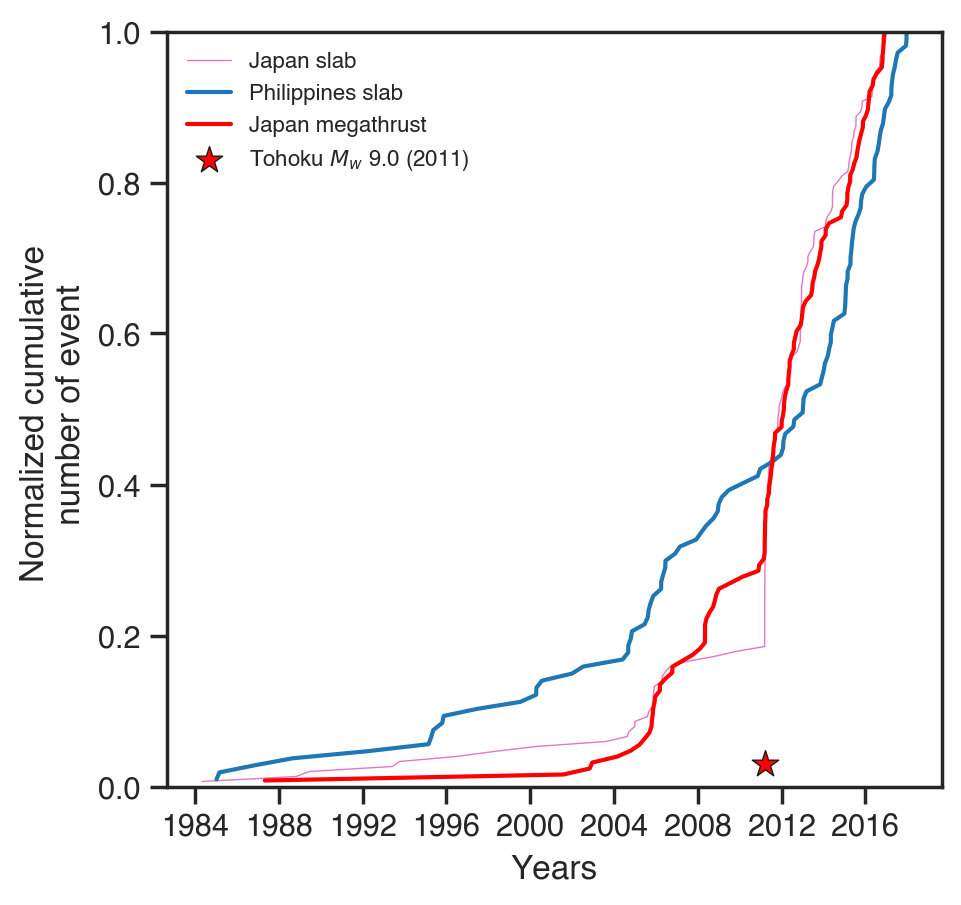

In [71]:
# Sort the data by date
data_DW_kur = data_DW_kur.sort_values(by='DATE')
data_DW_jpn = data_DW_jpn.sort_values(by='DATE')
data_DW_ryu = data_DW_ryu.sort_values(by='DATE')
data_mthrust_jpn = data_mthrust_jpn.sort_values(by='DATE')
data_tohoku_rup = data_tohoku_rup.sort_values(by='DATE')

# Calculate cumulative earthquake counts
cumulative_counts_DW_kur = range(1, len(data_DW_kur) + 1)
cumulative_counts_DW_jpn = range(1, len(data_DW_jpn) + 1)
cumulative_counts_DW_ryu = range(1, len(data_DW_ryu) + 1)
cumulative_counts_mthrust_jpn = range(1, len(data_mthrust_jpn) + 1)
cumulative_counts_tohoku_rup = range(1, len(data_tohoku_rup) + 1)

# Calculate the total number of earthquakes
total_earthquakes_DW_kur = len(data_DW_kur)
total_earthquakes_DW_jpn = len(data_DW_jpn)
total_earthquakes_DW_ryu = len(data_DW_ryu)
total_earthquakes_mthrust_jpn = len(data_mthrust_jpn)
total_earthquakes_tohoku_rup = len(data_tohoku_rup)

# Normalize cumulative counts by dividing by the total number
normalized_counts_kur = [count / total_earthquakes_DW_kur for count in cumulative_counts_DW_kur]
normalized_counts_jpn = [count / total_earthquakes_DW_jpn for count in cumulative_counts_DW_jpn]
normalized_counts_ryu = [count / total_earthquakes_DW_ryu for count in cumulative_counts_DW_ryu]
normalized_counts_mthrust_jpn = [count / total_earthquakes_mthrust_jpn for count in cumulative_counts_mthrust_jpn]
normalized_counts_tohoku_rup = [count / total_earthquakes_tohoku_rup for count in cumulative_counts_tohoku_rup]

fig, ax = plt.subplots(dpi = dpi, figsize=(5,5))

fig1 = ax

# Plot the cumulative earthquake counts
# fig1.plot(data_DW_kur['DATE'], normalized_counts_kur, color='tab:orange', label = 'Kuril Kamchatka slab', alpha=0.4)
fig1.plot(data_DW_jpn['DATE'], normalized_counts_jpn, color='tab:pink', label = 'Japan slab', lw=0.5)
fig1.plot(data_DW_ryu['DATE'], normalized_counts_ryu, color='tab:blue', label = 'Philippines slab')
fig1.plot(data_mthrust_jpn['DATE'], normalized_counts_mthrust_jpn, color='red', label = 'Japan megathrust')
# fig1.plot(data_tohoku_rup['DATE'], normalized_counts_tohoku_rup, color='tab:pink', label = 'Ruptured 2011 megathrust')


# Mark the largest earthquake with a star symbol
# Find the largest earthquake
largest_earthquake = data[data['MW'] >= 9]
# Convert the 'Date' column to datetime format
largest_earthquake['DATE'] = pd.to_datetime(largest_earthquake['DATE'])

fig1.scatter(largest_earthquake['DATE'], 0.03, s=100, c='red',
             marker='*', alpha = 1,
             edgecolor = 'k', linewidths = 0.5, label='Tohoku $M_w$ 9.0 (2011)')


## Also plot the location of 2004 Sumatra event

# # data = pd.read_csv('sum_with_2005_eqs.csv', header = 'infer')
# data_sum = pd.read_csv("/Users/mohd0001/Research/PhD_Monash/Paper2/time-series/data/SUeq_data.csv", header = 'infer')

# largest_earthquake = data_sum[data_sum['MW'] == data_sum['MW'].max()]
# # Convert the 'Date' column to datetime format
# largest_earthquake['DATE'] = pd.to_datetime(largest_earthquake['DATE'])

# fig1.scatter(largest_earthquake['DATE'], 0, s=100, c='yellow',
#              marker='*', alpha = 1,
#              edgecolor = 'k', linewidths = 0.5, label='Sumatra $M_w$ 9.2 (2004)')


fig1.set_xlabel('Years')
# # fig1.set_ylabel(r'$M_w$')
fig1.set_ylabel('Normalized cumulative \n number of event')

# fig1.set_yscale('log')

# fs = 10
fig1.legend(loc = 'upper left',
            fontsize = fs,
            facecolor="white",
            framealpha=1,
            edgecolor="white",
            markerscale=1)

# fig1.vline(x=2011.166, color='k', lw=1, linestyle='--')

# fig1.set_xlim([1981, 2018])
fig1.set_ylim([0, 1])

plt.show()

# Sumatra-Java

In [72]:
# data = pd.read_csv('sum_with_2005_eqs.csv', header = 'infer')

eq_file = "/Users/mohd0001/Research/PhD_Monash/Paper2/time-series/data/SUeq_data.csv"
data = pd.read_csv(eq_file, header = 'infer')
# data.dtypes

data.sort_values(by = 'MW', ascending = False, inplace = True)

data['DATE'] = pd.to_datetime(data['DATE']) # change dtype to datetime format
data['DATE'] = data['DATE'].dt.strftime('%Y-%m-%d') # change dtype to object

# data['DATE'] and data['TIME'] should be object (str) to perform + operator

data_dummy = np.array(data['DATE'] + ' ' + data['TIME'])

data_ev_time = []

for val in data_dummy:
    data_ev_time.append(UTCDateTime(val))

    
ref_date = data_ev_time[0]

data_ev_time = np.array(data_ev_time)

date = []

for val in data_ev_time:
    date.append(val - ref_date)
    
date = np.array(date) # this is in seconds

data['YEARS'] = date/31536000

data = data.sort_values(by ='YEARS', ascending=True) # this is an important step
# data = data[(data['DATE'] > '01-01-2003') & (data['DATE'] < '26-11-2004')]

In [73]:
# data = data[(data['YEARS'] > -10) & (data['YEARS'] < 0)]

## rupture area only
# data_mthrust_rup = data[(data['CLASS'] == 'MTHRUST') &
#                     (data['MW'] <= 5) &
#                     (data['LAT'] > 2) & (data['LAT'] < 13.5)]

# entire sumatra-andaman

mag = 5
depth = 0

data_mthrust_sum = data[(data['CLASS'] == 'MTHRUST') &
                    (data['MW'] <= mag) &
                    (data['LON'] < 105) & (data['LAT'] < 15)]

data_DW_sum = data[(data['CLASS'] == 'DGOING') & (data['P(km)'] > 0) &
               (data['DEPTH'] > depth) & (data['DEPTH'] < 700) &
               (data['MW'] <= mag) &
              (data['LAT'] < 15) & (data['LAT'] >= -1)]

data_DW_java = data[(data['CLASS'] == 'DGOING') & (data['P(km)'] > 0) &
               (data['DEPTH'] > depth) & (data['DEPTH'] < 700) &
               (data['MW'] <= mag) &
              (data['LAT'] < -1)]

## scatter plot

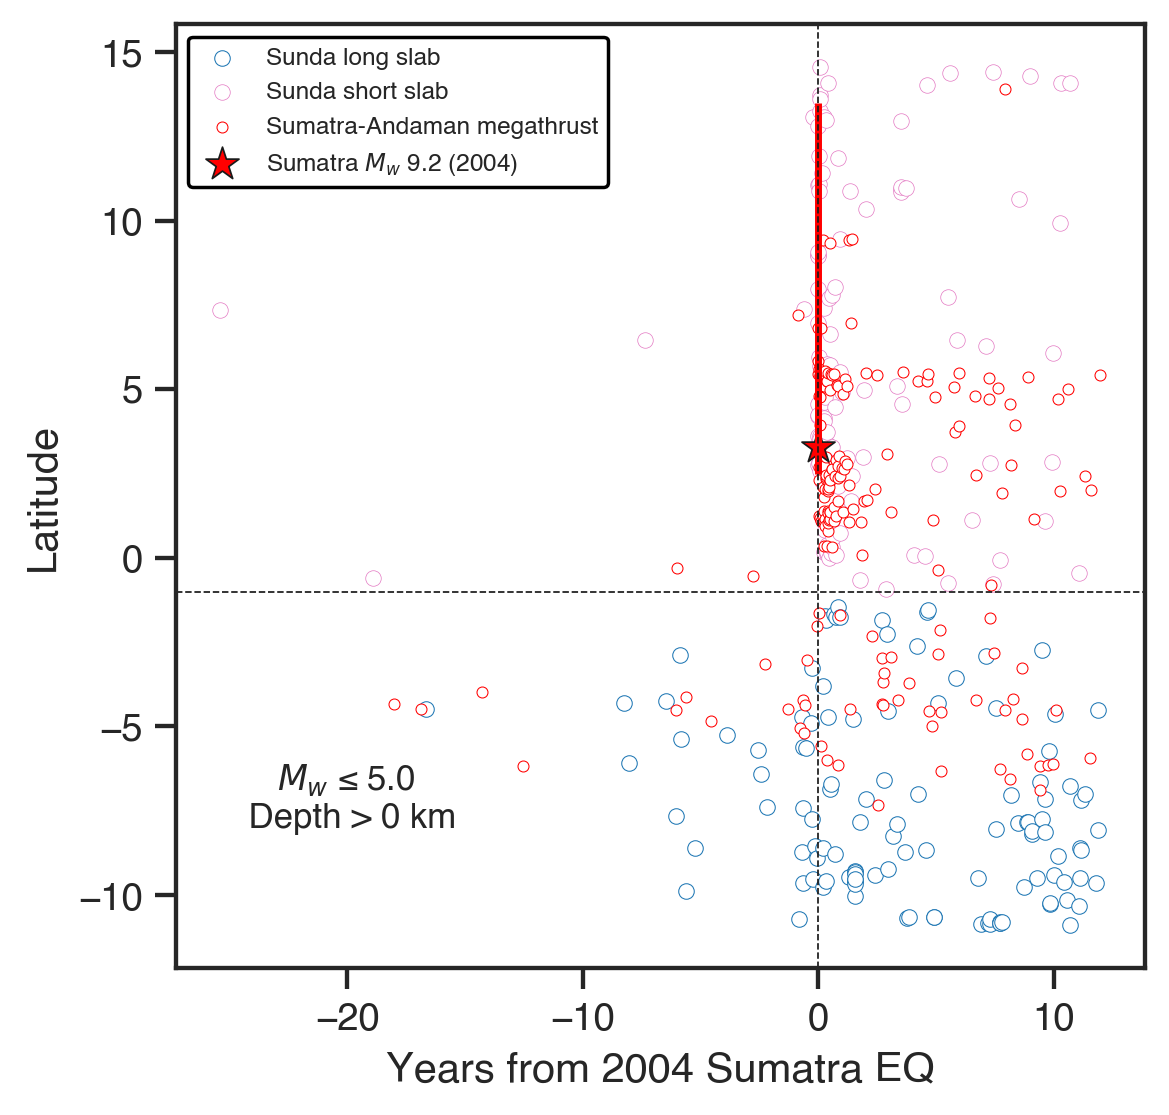

In [74]:
dpi =250

fig, ax = plt.subplots(dpi = dpi, figsize=(5,5))

fig1 = ax


# Draw a vertical line at the location of the largest magnitude year
fig1.axvline(x=0, color='k', lw=0.5, linestyle='--')
fig1.axhline(y=-1, color='k', lw=0.5, linestyle='--')

# rupture line
fig1.vlines(x=0, ymin=2.5, ymax=13.5, color='red', linestyle='-', lw=2)

fig1.text(-20, -8, '$M_w$ ≤ 5.0 \n Depth > 0 km', ha='center', fontsize=10)


fig1.scatter(data_DW_java['YEARS'], data_DW_java['LAT'],
             marker = 'o', s = 20, facecolor = 'white', alpha = 1,
             edgecolor = 'tab:blue', linewidths = 0.3, label ='Sunda long slab')

fig1.scatter(data_DW_sum['YEARS'], data_DW_sum['LAT'],
             marker = 'o', s = 20, facecolor = 'white', alpha = 1,
             edgecolor = 'tab:pink', linewidths = 0.2, label ='Sunda short slab')

fig1.scatter(data_mthrust_sum['YEARS'], data_mthrust_sum['LAT'],
             marker = 'o', s = 10, facecolor = 'white', alpha = 1,
             edgecolor = 'red', linewidths = 0.3, label ='Sumatra-Andaman megathrust')

# fig1.scatter(data_mthrust['YEARS'], data_mthrust['LAT'],
#              marker = 'o', s = 5, c = 'red', alpha = 1,
#              edgecolor = 'k', linewidths = 0, label ='Sumatra-Andaman megathrust')

fig1.set_xlabel('Years from 2004 Sumatra EQ')
# fig1.set_ylabel(r'$M_w$')
fig1.set_ylabel(r'Latitude')

# fig1.set_xlim([-3, 1]) #1984-2017
# fig1.set_ylim([1e18, 1e23])

data_great = data[(data['CLASS'] == 'MTHRUST') & (data['MW'] >= 9)]
fig1.scatter(data_great['YEARS'], data_great['LAT'],
            marker = '*', s = 100, c = 'red', alpha = 1,
             edgecolor = 'k', linewidths = 0.5, label='Sumatra $M_w$ 9.2 (2004)')

fs = 7
fig1.legend(loc = 'upper left',
            fontsize = fs,
            facecolor="white",
            framealpha=1,
            edgecolor="black",
            markerscale=1)

# fig1.text(-15, 0, 'Sumatra-Andaman slab', fontsize=fs, color='tab:pink', ha = 'center')
# fig1.text(-15, -3, 'Java slab', fontsize=fs, color='tab:blue', ha = 'center')

# plt.savefig("/Users/mohd0001/Research/PhD_Monash/Paper2/output/hist/Sunda-Lat-Years.jpeg"
#             , dpi = 500, transparent= True, bbox_inches='tight')

## bar plot

/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

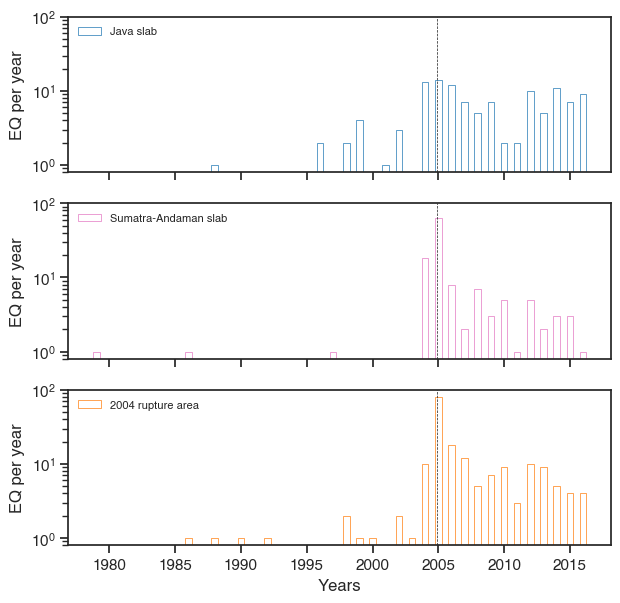

In [75]:
# Convert the 'Date' column to datetime format
data_DW_java['DATE'] = pd.to_datetime(data_DW_java['DATE'])
# Extract the year from the 'Date' column
data_DW_java['YEARS'] = data_DW_java['DATE'].dt.year


# Convert the 'Date' column to datetime format
data_DW_sum['DATE'] = pd.to_datetime(data_DW_sum['DATE'])
# Extract the year from the 'Date' column
data_DW_sum['YEARS'] = data_DW_sum['DATE'].dt.year


# Convert the 'Date' column to datetime format
data_mthrust_sum['DATE'] = pd.to_datetime(data_mthrust_sum['DATE'])
# Extract the year from the 'Date' column
data_mthrust_sum['YEARS'] = data_mthrust_sum['DATE'].dt.year


## Group the earthquakes by year and count the occurrences
earthquakes_per_year_Msum = data_mthrust_sum['YEARS'].value_counts().sort_index()
earthquakes_per_year_sum = data_DW_sum['YEARS'].value_counts().sort_index()
earthquakes_per_year_java = data_DW_java['YEARS'].value_counts().sort_index()


fig, ax = plt.subplots(3, 1, dpi = 100, figsize=(7,7), sharex=True)

fig1 = ax[0]
fig2 = ax[1]
fig3 = ax[2]

# Create a bar plot
fig1.bar(earthquakes_per_year_java.index, earthquakes_per_year_java.values,
         facecolor='white', edgecolor='tab:blue', width=0.5, lw=0.5, label ='Java slab')
fig2.bar(earthquakes_per_year_sum.index, earthquakes_per_year_sum.values,
         facecolor='white', edgecolor='tab:pink', width=0.5, lw=0.5, label ='Sumatra-Andaman slab')
fig3.bar(earthquakes_per_year_Msum.index, earthquakes_per_year_Msum.values,
         facecolor='white', edgecolor='tab:orange', width=0.5, lw=0.5, label ='2004 rupture area')


# fig1.axvline(x=2011.166, color='y', lw=1, linestyle='--', label ='2011 $M_w$ 9.0')
# fig2.axvline(x=2011.166, color='y', lw=1, linestyle='--', label ='2011 $M_w$ 9.0')


fig3.set_xlabel('Years')
# # # fig1.set_ylabel(r'$M_w$')
fig1.set_ylabel('EQ per year')
fig2.set_ylabel('EQ per year')
fig3.set_ylabel('EQ per year')

fig1.set_yscale('log')
fig2.set_yscale('log')
fig3.set_yscale('log')

fs = 8
fig1.legend(loc = 'upper left',
            fontsize = fs,
            facecolor="white",
            framealpha=1,
            edgecolor="white",
            markerscale=1)

fig2.legend(loc = 'upper left',
            fontsize = fs,
            facecolor="white",
            framealpha=1,
            edgecolor="white",
            markerscale=1)

fig3.legend(loc = 'upper left',
            fontsize = fs,
            facecolor="white",
            framealpha=1,
            edgecolor="white",
            markerscale=1)

# # fig1.set_xlim([1981, 2018])
fig1.set_ylim([8e-1, 1e2])
fig2.set_ylim([8e-1, 1e2])
fig3.set_ylim([8e-1, 1e2])


# fig1.text(1988, 20, '$M_w$ ≤ 5.0 \n Depth > 0 km', ha='center', fontsize=fs)
# fig2.text(1988, 20, '$M_w$ ≤ 5.0 \n Depth > 0 km', ha='center', fontsize=fs)

fig1.axvline(x=2004.916, color='k', lw=0.5, linestyle='--')
fig2.axvline(x=2004.916, color='k', lw=0.5, linestyle='--')
fig3.axvline(x=2004.916, color='k', lw=0.5, linestyle='--')

# plt.show()

# plt.savefig("/Users/mohd0001/Research/PhD_Monash/Paper2/output/hist/Japan-Rate-Years.pdf"
#             , dpi = 500, transparent= True, bbox_inches='tight')

## cumulative plot

/Users/mohd0001/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


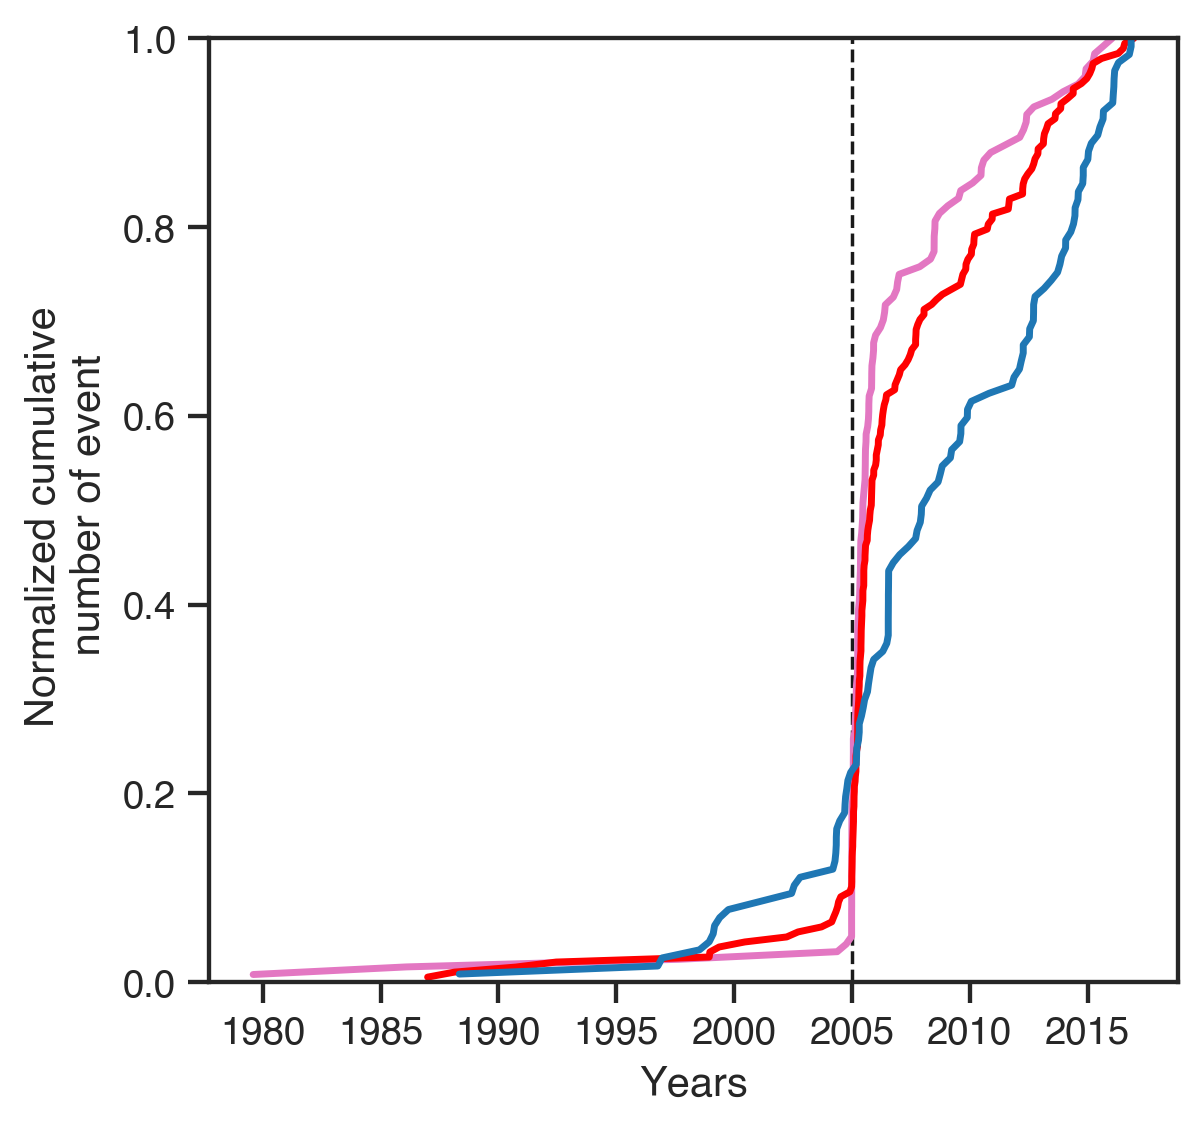

In [78]:
# mag = 5
# depth = 70

# data_DW_sum = data[(data['CLASS'] == 'DGOING') & (data['P(km)'] > 0) &
#                (data['DEPTH'] > depth) & (data['DEPTH'] < 700) &
#                (data['MW'] <= mag) &
#               (data['LAT'] < 15) & (data['LAT'] >= -1)]

# data_DW_java = data[(data['CLASS'] == 'DGOING') & (data['P(km)'] > 0) &
#                (data['DEPTH'] > depth) & (data['DEPTH'] < 700) &
#                (data['MW'] <= mag) &
#               (data['LAT'] < -1)]

# Sort the data by date
data_DW_java = data_DW_java.sort_values(by='DATE')
data_DW_sum = data_DW_sum.sort_values(by='DATE')
data_mthrust_sum = data_mthrust_sum.sort_values(by='DATE')

# Calculate cumulative earthquake counts
cumulative_counts_DW_java = range(1, len(data_DW_java) + 1)
cumulative_counts_DW_sum = range(1, len(data_DW_sum) + 1)
cumulative_counts_mthrust_sum = range(1, len(data_mthrust_sum) + 1)

# Calculate the total number of earthquakes
total_earthquakes_DW_java = len(data_DW_java)
total_earthquakes_DW_sum = len(data_DW_sum)
total_earthquakes_mthrust_sum = len(data_mthrust_sum)

# Normalize cumulative counts by dividing by the total number
normalized_counts_java = [count / total_earthquakes_DW_java for count in cumulative_counts_DW_java]
normalized_counts_sum = [count / total_earthquakes_DW_sum for count in cumulative_counts_DW_sum]
normalized_counts_Msum = [count / total_earthquakes_mthrust_sum for count in cumulative_counts_mthrust_sum]

fig, ax = plt.subplots(dpi = dpi, figsize=(5,5))

fig1 = ax

# Plot the cumulative earthquake counts
fig1.plot(data_DW_sum['DATE'], normalized_counts_sum, color='tab:pink', label = 'SUM-AND slab', lw=2)
fig1.plot(data_mthrust_sum['DATE'], normalized_counts_Msum, color='red', label = 'SUM-AND megathrust', lw=2)
fig1.plot(data_DW_java['DATE'], normalized_counts_java, color='tab:blue', label = 'Java slab', lw=2)
## Mark the largest earthquake with a star symbol
# Find the largest earthquake

data = pd.read_csv(eq_file, header = 'infer')
largest_earthquake = data[data['MW'] == data.MW.max()]
# ## Convert the 'Date' column to datetime format
largest_earthquake['DATE'] = pd.to_datetime(largest_earthquake['DATE'])
# fig1.scatter(largest_earthquake['DATE'], 0.03, s=100, c='red',
#              marker='*', alpha = 1,
#              edgecolor = 'k', linewidths = 0.5, label='$M_w$ 9.2 (2004)')

# java_slab_6eq = data[(data['MW'] == 7.3) & (data['CLASS'] == 'DGOING') & (data['DEPTH'] > 290)]
# # Convert the 'Date' column to datetime format
# java_slab_6eq['DATE'] = pd.to_datetime(java_slab_6eq['DATE'])
# fig1.scatter(java_slab_6eq['DATE'], 0.28, s=50, facecolor='white',
#              marker='o', alpha = 1,
#              edgecolor = 'yellow', linewidths = 1, label='$M_w$ 7.3 (582 km)')


fig1.set_xlabel('Years')
# # fig1.set_ylabel(r'$M_w$')
fig1.set_ylabel('Normalized cumulative \n number of event')

# fig1.set_yscale('log')

# fs = 10
# fig1.legend(loc = 'upper left',
#             fontsize = 8,
#             facecolor="white",
#             framealpha=1,
#             edgecolor="white",
#             markerscale=1)

# fig1.axvline(x=largest_earthquake['DATE'], color='k', lw=1, linestyle='--')
fig1.vlines(x=largest_earthquake['DATE'], ymin=0, ymax=1, color='k', linestyle='--', lw=1)

# fig1.text(2010, 10, '$M_w$ ≤ 5.0 \n Depth > 0 km', ha='center', fontsize=fs)

# fig1.set_xlim([1998, 2005])
fig1.set_ylim([0, 1])

plt.show()

In [77]:
year = 2004 # Replace with your specific year
month = 12    # Replace with your specific month

# Convert the year and month to a decimal year
decimal_year = year + (month - 1) / 12

print(decimal_year)

2004.9166666666667
